In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
from citipy import citipy

In [75]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "sauda"

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=6b9fca5bb7167ca8e527ee04dc1ced14&q=sauda'

In [76]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

594

In [78]:
cities

['punta arenas',
 'bredasdorp',
 'busselton',
 'qaanaaq',
 'nome',
 'avarua',
 'ushuaia',
 'dikson',
 'san quintin',
 'sisimiut',
 'bluff',
 'codrington',
 'lavrentiya',
 'laguna',
 'coquimbo',
 'portland',
 'liberal',
 'robore',
 'hobart',
 'cooma',
 'grand river south east',
 'albany',
 'sampit',
 'chagda',
 'saint-pierre',
 'smithers',
 'rikitea',
 'lebu',
 'jamestown',
 'leningradskiy',
 'vaini',
 'ust-kuyga',
 'bhainsdehi',
 'saint-germain-de-grantham',
 'iqaluit',
 'lazaro cardenas',
 'gediz',
 'baykit',
 'price',
 'upernavik',
 'cidreira',
 'barrow',
 'matagami',
 'wanaka',
 'puerto ayora',
 'jalu',
 'new norfolk',
 'liaqatabad',
 'taolanaro',
 'shahgarh',
 'pangnirtung',
 'west bay',
 'port moresby',
 'atuona',
 'morondava',
 'richards bay',
 'provideniya',
 'necochea',
 'slave lake',
 'mataura',
 'havoysund',
 'bethel',
 'alofi',
 'tura',
 'pilot butte',
 'chengde',
 'norman wells',
 'kenai',
 'attawapiskat',
 'kasane',
 'illoqqortoormiut',
 'arraial do cabo',
 'east london',


In [80]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': 6.35, 'lat': 59.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 273.245, 'pressure': 936.7, 'humidity': 100, 'temp_min': 273.245, 'temp_max': 273.245, 'sea_level': 1023.4, 'grnd_level': 936.7}, 'wind': {'speed': 1.06, 'deg': 255.003}, 'clouds': {'all': 64}, 'dt': 1538430704, 'sys': {'message': 0.0038, 'country': 'NO', 'sunrise': 1538372497, 'sunset': 1538413507}, 'id': 3140056, 'name': 'Sauda', 'cod': 200}.


In [81]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=6b9fca5bb7167ca8e527ee04dc1ced14&units=metric&q='

In [82]:
cities = ["punta arenas", "bredasdorp", "busselton", "qaanaaq","nome","avarua","ushuaia"]
# set up lists to hold reponse info
lat = []
temp = []
humidity = []
windspeed = []
cloudiness = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])
    humidity.append(response['main']['humidity'])
    windspeed.append(response['wind']['speed'])
    cloudiness.append(response['clouds']['all'])
    
print(f"The Latitude information received is: {lat}")
print(f"The Temperature information received is: {temp}")
print(f"The Humidity information received is: {humidity}")
print(f"The Windspeed information received is: {windspeed}")
print(f"The Cloudiness information received is: {cloudiness}")
#print(response)
    


The Latitude information received is: [-53.16, -34.53, -33.64, 77.48, 30.04, -21.21, -54.81]
The Temperature information received is: [5, 15, 12.75, -10.21, 24.83, 23, 3]
The Humidity information received is: [65, 87, 100, 100, 100, 56, 74]
The Windspeed information received is: [11.8, 6.7, 6.71, 6.06, 2.1, 5.1, 11.8]
The Cloudiness information received is: [75, 12, 0, 0, 90, 40, 40]


In [83]:
weather_dict = {"Cities" : cities,
               "Latitude" : lat,
               "Temp" : temp,
               "Humidity": humidity,
               "Windspeed" : windspeed,
               "Cloudiness": cloudiness}
weather_df = pd.DataFrame(weather_dict)
weather_df

,Cities,Latitude,Temp,Humidity,Windspeed,Cloudiness
0,punta arenas,-53.16,5.00,65,11.80,75
1,bredasdorp,-34.53,15.00,87,6.70,12
2,busselton,-33.64,12.75,100,6.71,0
3,qaanaaq,77.48,-10.21,100,6.06,0
4,nome,30.04,24.83,100,2.10,90
5,avarua,-21.21,23.00,56,5.10,40
6,ushuaia,-54.81,3.00,74,11.80,40


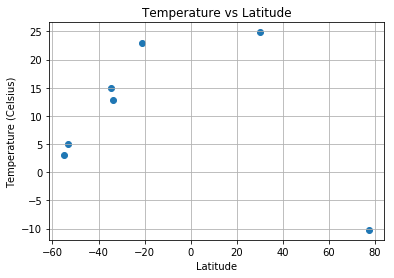

In [84]:
#Scatter plot Temp vs Latitude
plt.scatter(weather_df["Latitude"],weather_df["Temp"],marker = 'o')
plt.xlabel("Latitude")
plt.ylabel("Temperature (Celsius)")
plt.title("Temperature vs Latitude")
plt.grid()


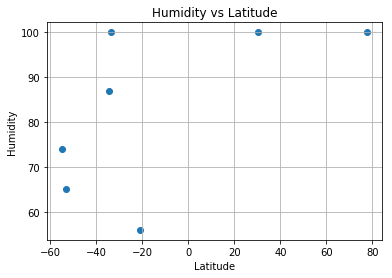

In [85]:
#Scatter plot Humidity vs Latitude
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],marker = 'o')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude")
plt.grid()

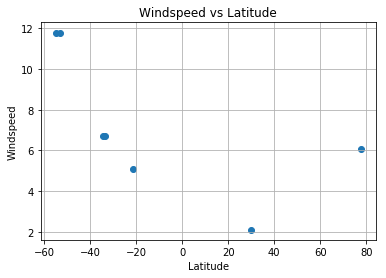

In [86]:
#Scatter plot Windspeed vs Latitude
plt.scatter(weather_df["Latitude"],weather_df["Windspeed"],marker = 'o')
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("Windspeed vs Latitude")
plt.grid()

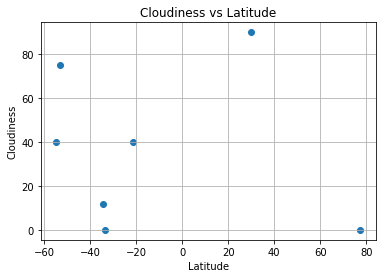

In [87]:
#Scatter plot Cloudiness vs Latitude
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],marker = 'o')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude")
plt.grid()